In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math

from anonymeter.evaluators import SinglingOutEvaluator
from anonymeter.evaluators import LinkabilityEvaluator
from anonymeter.evaluators import InferenceEvaluator

In [32]:
train = pd.read_csv("C:/Users/maria/OneDrive/Υπολογιστής/Thesis/Computational_Study/high_unique/train.csv")
control = pd.read_csv("C:/Users/maria/OneDrive/Υπολογιστής/Thesis/Computational_Study/high_unique/control.csv")

shigh_unique = pd.read_csv("C:/Users/maria/OneDrive/Υπολογιστής/Thesis/Computational_Study/high_unique/shigh_unique.csv")
shigh_unique09 = pd.read_csv("C:/Users/maria/OneDrive/Υπολογιστής/Thesis/Computational_Study/high_unique/shigh_unique09.csv")
synhigh_unique = pd.read_csv("C:/Users/maria/OneDrive/Υπολογιστής/Thesis/Computational_Study/high_unique/synhigh_unique.csv")

In [33]:
base_path = "C:/Users/maria/OneDrive/Υπολογιστής/Thesis/Computational_Study/high_unique"

for i in range(100, 59, -1):  
    suffix = f"{i:03d}"  
    filename = f"shigh_unique{suffix}.csv"
    full_path = f"{base_path}/{filename}"
    
    try:
        globals()[f"shigh_unique{suffix}"] = pd.read_csv(full_path)
        print(f"Imported: shigh_unique{suffix}")
    except FileNotFoundError:
        print(f"File not found: {filename}")


Imported: shigh_unique100
Imported: shigh_unique099
Imported: shigh_unique098
Imported: shigh_unique097
Imported: shigh_unique096
Imported: shigh_unique095
Imported: shigh_unique094
Imported: shigh_unique093
Imported: shigh_unique092
Imported: shigh_unique091
Imported: shigh_unique090
Imported: shigh_unique089
Imported: shigh_unique088
Imported: shigh_unique087
Imported: shigh_unique086
Imported: shigh_unique085
Imported: shigh_unique084
Imported: shigh_unique083
Imported: shigh_unique082
Imported: shigh_unique081
Imported: shigh_unique080
Imported: shigh_unique079
Imported: shigh_unique078
Imported: shigh_unique077
Imported: shigh_unique076
Imported: shigh_unique075
Imported: shigh_unique074
Imported: shigh_unique073
Imported: shigh_unique072
Imported: shigh_unique071
Imported: shigh_unique070
Imported: shigh_unique069
Imported: shigh_unique068
Imported: shigh_unique067
Imported: shigh_unique066
Imported: shigh_unique065
Imported: shigh_unique064
Imported: shigh_unique063
Imported: sh

## Singling Out Risk

## Synthesizer

In [29]:
sevaluator1_uni = SinglingOutEvaluator(ori=train, 
                                 syn=shigh_unique, 
                                 control=control,
                                 n_attacks=2100)

try:
    sevaluator1_uni.evaluate(mode='univariate')
    risk = sevaluator1_uni.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator1_uni.queries()[:3])
res = sevaluator1_uni.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.0, ci=(0.0, 0.0))
[]
Successs rate of main attack: SuccessRate(value=0.0009129630002746145, error=0.0009129630002746143)
Successs rate of baseline attack: SuccessRate(value=0.0009129630002746145, error=0.0009129630002746143)
Successs rate of control attack: SuccessRate(value=0.010349660629405536, error=0.0042309945101319585)


c:\Users\maria\AppData\Local\Programs\Python\Python310\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.0009129630002746145, baseline = 0.0009129630002746145. Analysis results cannot be trusted.
  self._sanity_check()


## Synthpop

In [44]:
sevaluator1_uni = SinglingOutEvaluator(ori=train, 
                                 syn=synhigh_unique, 
                                 control=control,
                                 n_attacks=2200)

try:
    sevaluator1_uni.evaluate(mode='univariate')
    risk = sevaluator1_uni.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator1_uni.queries()[:3])
res = sevaluator1_uni.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.8140459475324208, ci=(0.7959387711491481, 0.8321531239156934))
['income == 1131100.0', 'zip_code == 91204', 'zip_code == 31854']
Successs rate of main attack: SuccessRate(value=0.8407686142731294, error=0.015264457249330897)
Successs rate of baseline attack: SuccessRate(value=0.02310544127688543, error=0.006217051616725872)
Successs rate of control attack: SuccessRate(value=0.1437057508890146, error=0.0146323808795678)


# Singling Out Multivariate Risk

## Synthesizer

In [45]:
sevaluator1_multi = SinglingOutEvaluator(ori=train, 
                                 syn=shigh_unique, 
                                 control=control,
                                 n_attacks=300)

try:
    sevaluator1_multi.evaluate(mode='multivariate')
    risk = sevaluator1_multi.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator1_multi.queries()[:3])
res = sevaluator1_multi.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.2482408353851596, ci=(0.1612697068699286, 0.3352119639003906))
['income<= 800.0 & age>= 81 & zip_code>= 99246.0948708698', "education_level== 'High School' & job== 'Service' & income<= 1000.0", "job== 'Management' & income>= 4070277.06285213 & age<= 18"]
Successs rate of main attack: SuccessRate(value=0.42759381788980005, error=0.05562024205116892)
Successs rate of baseline attack: SuccessRate(value=0.01619505590002756, error=0.012788437462312275)
Successs rate of control attack: SuccessRate(value=0.2385777133778355, error=0.047808344941825724)


In [ ]:
sevaluator1_multi = SinglingOutEvaluator(ori=train, 
                                 syn=shigh_unique, 
                                 control=control,
                                 n_attacks=500)

try:
    sevaluator1_multi.evaluate(mode='multivariate')
    risk = sevaluator1_multi.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator1_multi.queries()[:3])
res = sevaluator1_multi.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.34240158506695495, ci=(0.2964103878125209, 0.388392782321389))
["zip_code>= 99938.0 & marital_status== 'Married' & education_level== 'Master\\'s'", "ethnicity== 'White' & job== 'Professional' & zip_code<= 10056.3930207454", "education_level== 'High School' & ethnicity== 'Hispanic' & income<= 800.0"]
Successs rate of main attack: SuccessRate(value=0.37297591557907867, error=0.042215167090554985)
Successs rate of baseline attack: SuccessRate(value=0.007781672868929911, error=0.006684042346247121)
Successs rate of control attack: SuccessRate(value=0.04649392367412674, error=0.018054269414858423)


In [64]:
sevaluator1_multi = SinglingOutEvaluator(ori=train, 
                                 syn=shigh_unique, 
                                 control=control,
                                 n_attacks=800)

try:
    sevaluator1_multi.evaluate(mode='multivariate')
    risk = sevaluator1_multi.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator1_multi.queries()[:3])
res = sevaluator1_multi.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.21268802395491399, ci=(0.1594735905674174, 0.2659024573424106))
['age>= 88 & income<= 1000.0 & zip_code>= 82211.1190503389', "income<= 1300.0 & education_level== 'Some College' & age<= 18", 'income<= 800.0 & age>= 83 & zip_code>= 78594.3436527311']
Successs rate of main attack: SuccessRate(value=0.39550178200159597, error=0.033797688181716745)
Successs rate of baseline attack: SuccessRate(value=0.009853596531295446, error=0.0064118777583580715)
Successs rate of control attack: SuccessRate(value=0.23219989484348072, error=0.029160712807792817)


## synthesizer rankcor = 0.9

In [62]:
sevaluator1_multi = SinglingOutEvaluator(ori=train, 
                                 syn=shigh_unique09, 
                                 control=control,
                                 n_attacks=500)

try:
    sevaluator1_multi.evaluate(mode='multivariate')
    risk = sevaluator1_multi.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator1_multi.queries()[:3])
res = sevaluator1_multi.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.23914755070034932, ci=(0.17213693839787902, 0.3061581630028196))
['zip_code<= 29961.1810285135 & age>= 88 & income>= 2192701.7770228', "income<= 1100.0 & education_level== 'Some College' & age>= 88", "education_level== 'Bachelor\\'s' & marital_status== 'Single' & income<= 900.0"]
Successs rate of main attack: SuccessRate(value=0.41664044459877037, error=0.04304297780562402)
Successs rate of baseline attack: SuccessRate(value=0.009766424188006807, error=0.00772382791604657)
Successs rate of control attack: SuccessRate(value=0.23328162255612064, error=0.036871837450556985)


In [65]:
sevaluator1_multi = SinglingOutEvaluator(ori=train, 
                                 syn=shigh_unique09, 
                                 control=control,
                                 n_attacks=800)

try:
    sevaluator1_multi.evaluate(mode='multivariate')
    risk = sevaluator1_multi.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator1_multi.queries()[:3])
res = sevaluator1_multi.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.25473989314562906, ci=(0.20509585676647504, 0.30438392952478305))
['age<= 19 & income>= 417700.0 & zip_code>= 99890.0', "education_level== 'Master\\'s' & income<= 1500.0 & zip_code<= 10151.0", "job== 'Executive' & income>= 7990364.91129541 & ethnicity== 'Asian'"]
Successs rate of main attack: SuccessRate(value=0.4042099668347963, error=0.03392136219344641)
Successs rate of baseline attack: SuccessRate(value=0.012341649340781255, error=0.007265961469163872)
Successs rate of control attack: SuccessRate(value=0.20056094820378567, error=0.027643617124108462)


## Synthpop

In [46]:
sevaluator2_multi = SinglingOutEvaluator(ori=train, 
                                 syn=synhigh_unique, 
                                 control=control,
                                 n_attacks=300)

try:
    sevaluator2_multi.evaluate(mode='multivariate')
    risk = sevaluator2_multi.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator2_multi.queries()[:3])
res = sevaluator2_multi.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.216761993977387, ci=(0.1462554785302883, 0.2872685094244857))
["zip_code>= 99931 & ethnicity== 'Black' & income>= 58600.0", "zip_code>= 99940 & age<= 24 & gender== 'Female'", "job== 'Unemployed' & zip_code>= 99905 & income<= 1900.0"]
Successs rate of main attack: SuccessRate(value=0.3255669249163365, error=0.052641528832588866)
Successs rate of baseline attack: SuccessRate(value=0.029359816283700275, error=0.01801215598457504)
Successs rate of control attack: SuccessRate(value=0.13891681724112884, error=0.03861646238500256)


In [63]:
sevaluator2_multi = SinglingOutEvaluator(ori=train, 
                                 syn=synhigh_unique, 
                                 control=control,
                                 n_attacks=500)

try:
    sevaluator2_multi.evaluate(mode='multivariate')
    risk = sevaluator2_multi.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator2_multi.queries()[:3])
res = sevaluator2_multi.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.2622123714581791, ci=(0.2186334203778857, 0.3057913225384725))
['age<= 29 & income>= 78400.0 & zip_code<= 10063', 'zip_code>= 99198 & age<= 19 & income>= 5789700.0', "income>= 4403500.0 & age<= 18 & gender== 'Male'"]
Successs rate of main attack: SuccessRate(value=0.29358586281600285, error=0.03973336898037523)
Successs rate of baseline attack: SuccessRate(value=0.023659683421545074, error=0.012760499825334266)
Successs rate of control attack: SuccessRate(value=0.04252374280093447, error=0.01726758058544172)


In [66]:
sevaluator2_multi = SinglingOutEvaluator(ori=train, 
                                 syn=synhigh_unique, 
                                 control=control,
                                 n_attacks=800)

try:
    sevaluator2_multi.evaluate(mode='multivariate')
    risk = sevaluator2_multi.risk()
    print(risk)

except RuntimeError as ex: 
    print(f"Singling out evaluation failed with {ex}. Please re-run this cell."
          "For more stable results increase `n_attacks`. Note that this will "
          "make the evaluation slower.")

print(sevaluator2_multi.queries()[:3])
res = sevaluator2_multi.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.19493131655233897, ci=(0.15385907691707484, 0.2360035561876031))
["zip_code>= 99930 & age>= 88 & ethnicity== 'White'", "marital_status== 'Single' & ethnicity== 'Other' & income<= 600.0", "marital_status== 'Divorced' & ethnicity== 'Asian' & income<= 1100.0"]
Successs rate of main attack: SuccessRate(value=0.291003564003192, error=0.03138435520218948)
Successs rate of baseline attack: SuccessRate(value=0.02975801900718193, error=0.011528387587270964)
Successs rate of control attack: SuccessRate(value=0.11933422504950641, error=0.02233615759574373)


# Linkability

In [35]:
aux_cols = [["age","zip_code","gender","education_level"],
            ["ethnicity","marital_status","job","income"]]

## synthesizer rankcor = 1

### n_neighbors = 1

In [37]:
levaluator1 = LinkabilityEvaluator(ori=train, 
                                 syn=shigh_unique, 
                                 control=control,
                                 n_attacks=6000,
                                 aux_cols=aux_cols,
                                 n_neighbors=1)

levaluator1.evaluate(n_jobs=-2) 
print(levaluator1.risk())
res = levaluator1.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.2569177550852946, ci=(0.24585720387190577, 0.2679783062986834))
Successs rate of main attack: SuccessRate(value=0.2571554795375313, error=0.011054456938821781)
Successs rate of baseline attack: SuccessRate(value=0.00031991674389155876, error=0.00031991674389155876)
Successs rate of control attack: SuccessRate(value=0.00031991674389155876, error=0.00031991674389155876)


### n_neihbors = 10

In [36]:
levaluator1 = LinkabilityEvaluator(ori=train, 
                                 syn=shigh_unique, 
                                 control=control,
                                 n_attacks=4000,
                                 aux_cols=aux_cols,
                                 n_neighbors=10)

levaluator1.evaluate(n_jobs=-2) 
print(levaluator1.risk())
res = levaluator1.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.9892561749487625, ci=(0.9860940533511784, 0.9924182965463466))
Successs rate of main attack: SuccessRate(value=0.9892801126488687, error=0.0031550414151908)
Successs rate of baseline attack: SuccessRate(value=0.0029773230366264896, error=0.001618780091608312)
Successs rate of control attack: SuccessRate(value=0.0022280426190937654, error=0.0013800768846600243)


### n_neighbors = 20

In [38]:
levaluator1 = LinkabilityEvaluator(ori=train, 
                                 syn=shigh_unique, 
                                 control=control,
                                 n_attacks=4000,
                                 aux_cols=aux_cols,
                                 n_neighbors=20)

levaluator1.evaluate(n_jobs=-2) 
print(levaluator1.risk())
res = levaluator1.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.9995139757242464, ci=(0.999027948439788, 1.0))
Successs rate of main attack: SuccessRate(value=0.9995202783551492, error=0.00047972164485074323)
Successs rate of baseline attack: SuccessRate(value=0.010969647490308878, error=0.0031920126384977626)
Successs rate of control attack: SuccessRate(value=0.012967728603729474, error=0.0034730243526355305)


## synthpop

### n_neighbors = 1

In [39]:
levaluator21 = LinkabilityEvaluator(ori=train, 
                                 syn=synhigh_unique, 
                                 control=control,
                                 n_attacks=4000,
                                 aux_cols=aux_cols,
                                 n_neighbors=1)

levaluator21.evaluate(n_jobs=-2) 
print(levaluator21.risk())
res = levaluator21.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.0034983201683914398, ci=(0.001547577666405791, 0.005449062670377088))
Successs rate of main attack: SuccessRate(value=0.003976363593336788, error=0.00189029643355562)
Successs rate of baseline attack: SuccessRate(value=0.00047972164485074323, error=0.00047972164485074323)
Successs rate of control attack: SuccessRate(value=0.00047972164485074323, error=0.00047972164485074323)


### n_neighbors = 10

In [12]:
levaluator2 = LinkabilityEvaluator(ori=train, 
                                 syn=synhigh_unique, 
                                 control=control,
                                 n_attacks=4000,
                                 aux_cols=aux_cols,
                                 n_neighbors=10)

levaluator2.evaluate(n_jobs=-2) 
print(levaluator2.risk())
res = levaluator2.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.02304654982805469, ci=(0.017878470288449855, 0.028214629367659526))
Successs rate of main attack: SuccessRate(value=0.025955255840963355, error=0.004903996713803015)
Successs rate of baseline attack: SuccessRate(value=0.0017285223407386163, error=0.0011944825710627444)
Successs rate of control attack: SuccessRate(value=0.0029773230366264896, error=0.001618780091608312)


### n_neighbors = 20

In [40]:
levaluator22 = LinkabilityEvaluator(ori=train, 
                                 syn=synhigh_unique, 
                                 control=control,
                                 n_attacks=4000,
                                 aux_cols=aux_cols,
                                 n_neighbors=20)

levaluator22.evaluate(n_jobs=-2) 
print(levaluator22.risk())
res = levaluator22.results()

print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

PrivacyRisk(value=0.02912925762244881, ci=(0.021867801952011694, 0.03639071329288592))
Successs rate of main attack: SuccessRate(value=0.04268918516586086, error=0.006246334634205669)
Successs rate of baseline attack: SuccessRate(value=0.014965809717150072, error=0.0037319141792923434)
Successs rate of control attack: SuccessRate(value=0.013966769160439773, error=0.0036049270894928822)


## synthesizer rankcor = [0.70,0.99]

In [13]:
linkability_results = []
suffixes = [f"{i:03d}" for i in range(100, 59, -1)]

for suffix in suffixes:  
    syn_varname = f"shigh_unique{suffix}"
    
    if syn_varname in globals():
        syn_data = globals()[syn_varname]
        
        print(f"Evaluating dataset: {syn_varname}")
        
        levaluator = LinkabilityEvaluator(
            ori=train,
            syn=syn_data,
            control=control,
            n_attacks=4000,
            aux_cols=aux_cols,
            n_neighbors=10
        )
        
        levaluator.evaluate(n_jobs=-2)
        
        res = levaluator.results()

        privacy_risk = levaluator.risk()
        print(f"Privacy risk for {syn_varname}: {privacy_risk}")
        
        linkability_results.append({
            "rankcor": int(suffix) / 100,  
            "attack_rate": res.attack_rate.value,  
            "baseline_rate": res.baseline_rate.value, 
            "control_rate": res.control_rate.value,   
            "risk": privacy_risk  
        })

df_link = pd.DataFrame(linkability_results)

df_link = df_link.sort_values(by="rankcor", ascending=False)

Evaluating dataset: shigh_unique100
Privacy risk for shigh_unique100: PrivacyRisk(value=0.9697540952923843, ci=(0.9644643302685747, 0.9750438603161939))
Evaluating dataset: shigh_unique099
Privacy risk for shigh_unique099: PrivacyRisk(value=0.8497162719213209, ci=(0.8386304269905325, 0.8608021168521094))
Evaluating dataset: shigh_unique098
Privacy risk for shigh_unique098: PrivacyRisk(value=0.8421219938614067, ci=(0.8308057356656866, 0.8534382520571269))
Evaluating dataset: shigh_unique097
Privacy risk for shigh_unique097: PrivacyRisk(value=0.806475695994983, ci=(0.7942201875608353, 0.8187312044291307))
Evaluating dataset: shigh_unique096
Privacy risk for shigh_unique096: PrivacyRisk(value=0.7699777313113343, ci=(0.7569218796359639, 0.7830335829867047))
Evaluating dataset: shigh_unique095
Privacy risk for shigh_unique095: PrivacyRisk(value=0.6387417146440719, ci=(0.6238366385170294, 0.6536467907711144))
Evaluating dataset: shigh_unique094
Privacy risk for shigh_unique094: PrivacyRisk(v

In [14]:
df_link['risk_value'] = df_link['risk'].apply(lambda x: x.value)
df_link['risk_ci_lower'] = df_link['risk'].apply(lambda x: x.ci[0])
df_link['risk_ci_upper'] = df_link['risk'].apply(lambda x: x.ci[1])

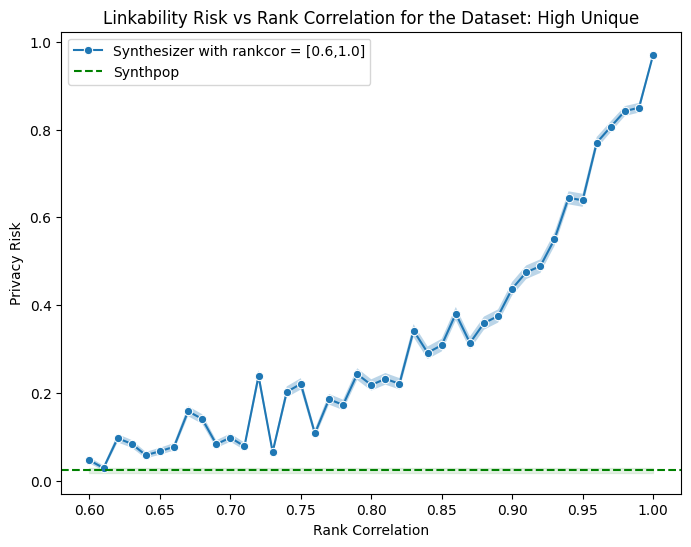

In [28]:
risk1 = levaluator2.risk()

row1 = {
    'rankcor': 1.00,  
    'risk_value': risk1.value,
    'risk_ci_lower': risk1.ci[0],
    'risk_ci_upper': risk1.ci[1]
}


plt.figure(figsize=(8, 6))
sns.lineplot(
    x='rankcor',
    y='risk_value',
    data=df_link,
    marker='o',
    label='Synthesizer with rankcor = [0.6,1.0]'
)

plt.fill_between(
    df_link['rankcor'],
    df_link['risk_ci_lower'],
    df_link['risk_ci_upper'],
    alpha=0.3
)

plt.axhline(y=risk1.value, color='green', linestyle='--', label='Synthpop')
plt.fill_between(
    df_link['rankcor'],
    risk1.ci[0],
    risk1.ci[1],
    color='green',
    alpha=0.1
)

plt.xlabel('Rank Correlation')
plt.ylabel('Privacy Risk')
plt.title('Linkability Risk vs Rank Correlation for the Dataset: High Unique')
plt.legend()
plt.show()



# Inference

## synthesizer rankcor = 1

In [17]:
columns = train.columns
results1 = []

for secret in columns:
    
    aux_cols = [col for col in columns if col != secret]
    
    ievaluator1 = InferenceEvaluator(ori=train, 
                                   syn=shigh_unique, 
                                   control=control,
                                   aux_cols=aux_cols,
                                   secret=secret,
                                   n_attacks=2000)
    ievaluator1.evaluate(n_jobs=-2)
    results1.append((secret, ievaluator1.results()))

print(ievaluator1.risk())

PrivacyRisk(value=0.9954600054461108, ci=(0.9926499091250384, 0.9982701017671832))


## synthpop

In [18]:
columns = train.columns
results3 = []

for secret in columns:
    
    aux_cols = [col for col in columns if col != secret]
    
    ievaluator3 = InferenceEvaluator(ori=train, 
                                   syn=synhigh_unique, 
                                   control=control,
                                   aux_cols=aux_cols,
                                   secret=secret,
                                   n_attacks=1000)
    ievaluator3.evaluate(n_jobs=-2)
    results3.append((secret, ievaluator3.results()))

print(ievaluator3.risk())

PrivacyRisk(value=0.03850359898986391, ci=(0.022406672679021068, 0.05460052530070676))


## synthesizer rankcor = [0.70,0.99]

In [19]:
columns = train.columns

for i in range(100, 59, -1):  
    suffix = f"{i:03d}"  
    
    syn_data_varname = f"shigh_unique{suffix}"
    results_varname = f"results{suffix}"
    
    if syn_data_varname in globals():
        syn_data = globals()[syn_data_varname]
        results_list = []

        print(f"\nRunning inference attacks on: {syn_data_varname}")
        
        for secret in columns:
            aux_cols = [col for col in columns if col != secret]
            
            ievaluator = InferenceEvaluator(
                ori=train,
                syn=syn_data,
                control=control,
                aux_cols=aux_cols,
                secret=secret,
                n_attacks=2000
            )
            ievaluator.evaluate(n_jobs=-2)
            results_list.append((secret, ievaluator.results()))
        
        globals()[results_varname] = results_list

        print(f"Risk for {syn_data_varname}: {ievaluator.risk()}")
    else:
        print(f"{syn_data_varname} not found in globals.")



Running inference attacks on: shigh_unique100
Risk for shigh_unique100: PrivacyRisk(value=0.9622645631849546, ci=(0.9538678565044869, 0.9706612698654222))

Running inference attacks on: shigh_unique099
Risk for shigh_unique099: PrivacyRisk(value=0.9011577142219046, ci=(0.8879451452505076, 0.9143702831933016))

Running inference attacks on: shigh_unique098
Risk for shigh_unique098: PrivacyRisk(value=0.8368625772838669, ci=(0.820420181002093, 0.8533049735656408))

Running inference attacks on: shigh_unique097
Risk for shigh_unique097: PrivacyRisk(value=0.8053196940350816, ci=(0.7877548000533902, 0.8228845880167731))

Running inference attacks on: shigh_unique096
Risk for shigh_unique096: PrivacyRisk(value=0.7704811229513973, ci=(0.7517214737017518, 0.7892407722010427))

Running inference attacks on: shigh_unique095
Risk for shigh_unique095: PrivacyRisk(value=0.6498476333869747, ci=(0.6284748701583482, 0.6712203966156012))

Running inference attacks on: shigh_unique094
Risk for shigh_uni

c:\Users\maria\AppData\Local\Programs\Python\Python310\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.3692511331938441, baseline = 0.3697501746702035. Analysis results cannot be trusted.
  self._sanity_check()


Risk for shigh_unique065: PrivacyRisk(value=0.0636481901372518, ci=(0.05010344758386972, 0.07719293269063388))

Running inference attacks on: shigh_unique064
Risk for shigh_unique064: PrivacyRisk(value=0.062215671531345204, ci=(0.04855346009909003, 0.07587788296360037))

Running inference attacks on: shigh_unique063
Risk for shigh_unique063: PrivacyRisk(value=0.08269859906417115, ci=(0.06781922843747513, 0.09757796969086717))

Running inference attacks on: shigh_unique062
Risk for shigh_unique062: PrivacyRisk(value=0.10975431357281974, ci=(0.09362785468193247, 0.12588077246370702))

Running inference attacks on: shigh_unique061


c:\Users\maria\AppData\Local\Programs\Python\Python310\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.4945105437600469, baseline = 0.49550862671276563. Analysis results cannot be trusted.
  self._sanity_check()


Risk for shigh_unique061: PrivacyRisk(value=0.031650081123324764, ci=(0.01977773190999215, 0.043522430336657376))

Running inference attacks on: shigh_unique060
Risk for shigh_unique060: PrivacyRisk(value=0.05233950659733238, ci=(0.039763080196573104, 0.06491593299809166))


C:\Users\maria\AppData\Local\Temp\ipykernel_23816\804254491.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(secrets, rotation=45, ha='right')
C:\Users\maria\AppData\Local\Temp\ipykernel_23816\804254491.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(secrets, rotation=45, ha='right')
C:\Users\maria\AppData\Local\Temp\ipykernel_23816\804254491.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(secrets, rotation=45, ha='right')
C:\Users\maria\AppData\Local\Temp\ipykernel_23816\804254491.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(secrets, rotation=45, ha='right')


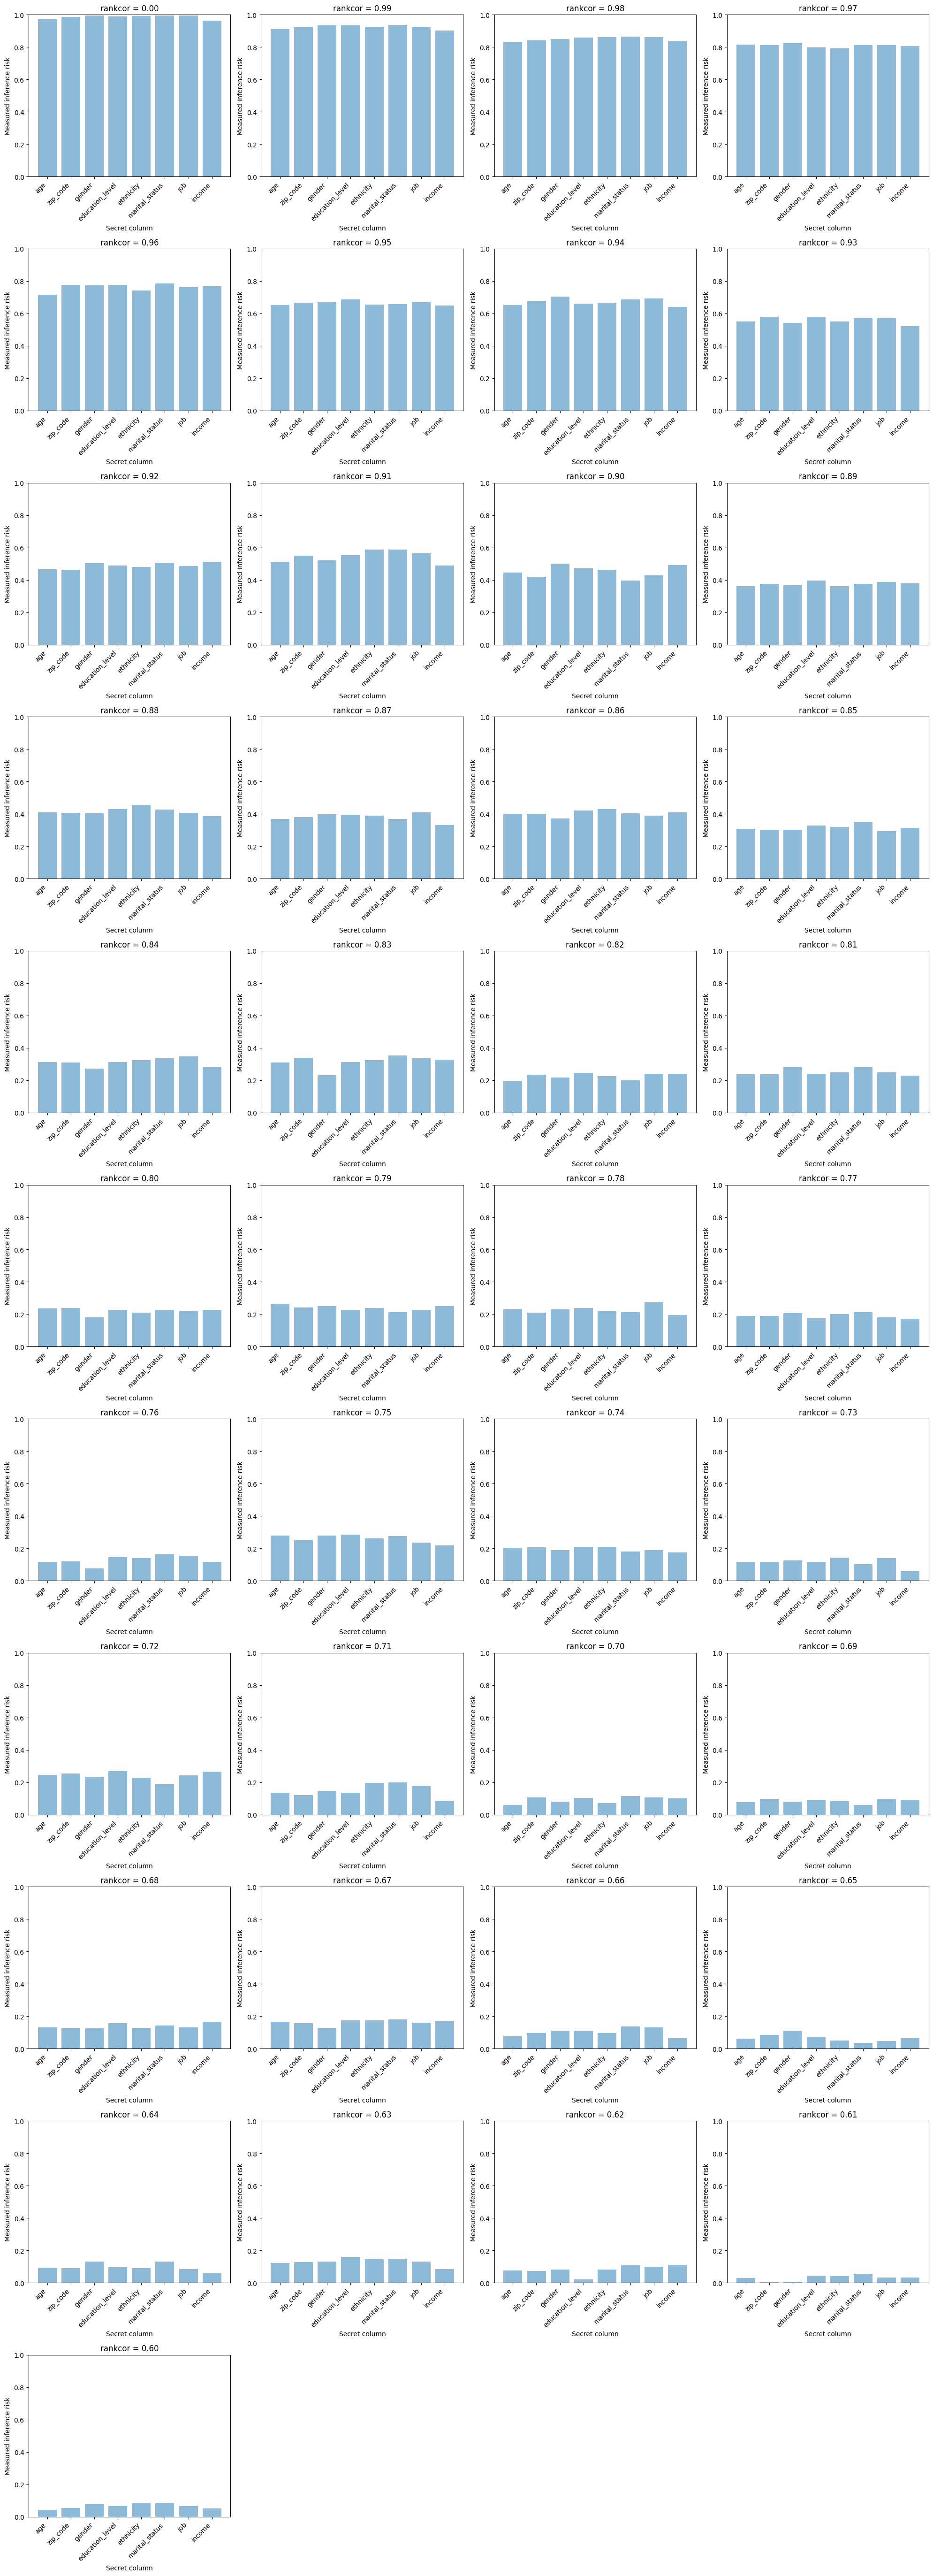

In [20]:
suffixes = [f"{i:03d}" for i in range(100, 59, -1)]
num_plots = len(suffixes)

cols = 4
rows = math.ceil(num_plots / cols)
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
axes = axes.flatten()  

for idx, suffix in enumerate(suffixes):
    results_varname = f"results{suffix}"
    if results_varname in globals():
        results = globals()[results_varname]
        risks = [res[1].risk().value for res in results]
        secrets = [res[0] for res in results]

        ax = axes[idx]
        ax.bar(x=secrets, height=risks, alpha=0.5, ecolor='black', capsize=10)
        ax.set_xticklabels(secrets, rotation=45, ha='right')
        ax.set_ylabel("Measured inference risk")
        ax.set_xlabel("Secret column")
        ax.set_ylim(0, 1)
        ax.set_title(f"rankcor = 0.{suffix[-2:]}")
    else:
        axes[idx].axis("off") 
        
for j in range(idx + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


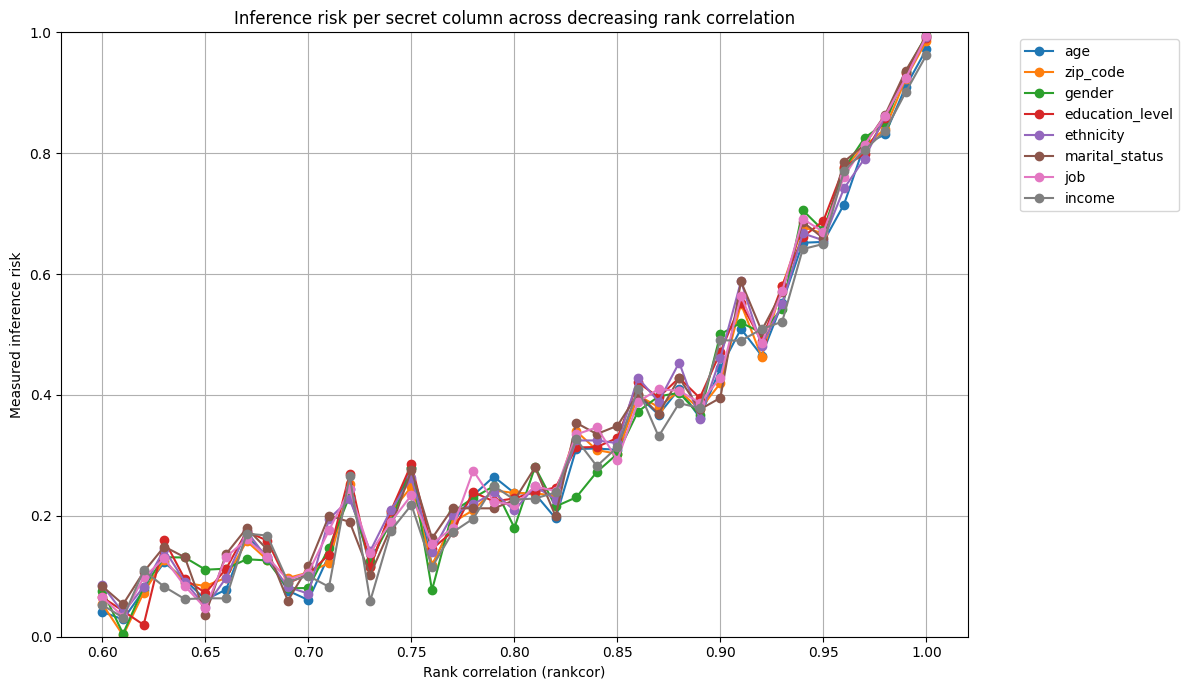

In [21]:
suffixes = [f"{i:03d}" for i in range(100, 59, -1)]
rankcors = [int(suffix) / 100 for suffix in suffixes]

secret_columns = [res[0] for res in globals()[f"results{suffixes[0]}"]]

risk_by_secret = {secret: [] for secret in secret_columns}

for suffix in suffixes:
    results_varname = f"results{suffix}"
    if results_varname in globals():
        results = globals()[results_varname]
        for secret, result in results:
            risk_by_secret[secret].append(result.risk().value)
    else:
        for secret in secret_columns:
            risk_by_secret[secret].append(None)  

plt.figure(figsize=(12, 7))

for secret, risks in risk_by_secret.items():
    plt.plot(rankcors, risks, marker='o', label=secret)

plt.xlabel("Rank correlation (rankcor)")
plt.ylabel("Measured inference risk")
plt.title("Inference risk per secret column across decreasing rank correlation")
plt.xticks(rankcors[::5])
plt.ylim(0, 1)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


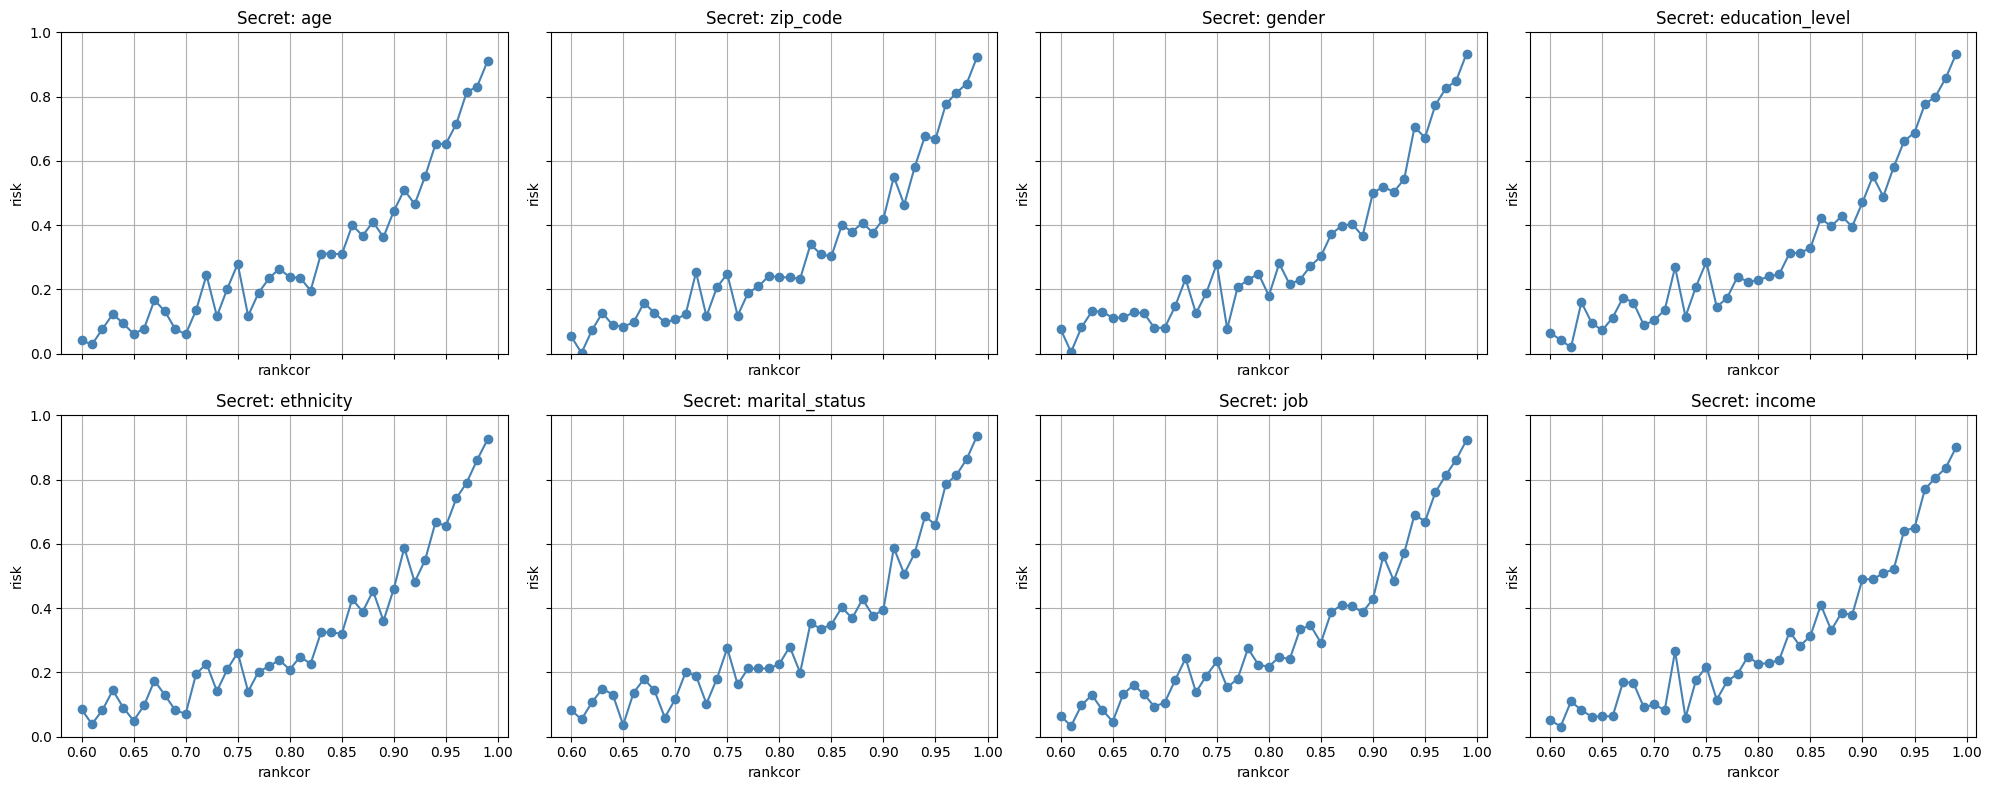

In [22]:
suffixes = [f"{i:03d}" for i in range(99, 59, -1)]
rankcors = [int(suffix) / 100 for suffix in suffixes]
secret_columns = [res[0] for res in globals()[f"results{suffixes[0]}"]]

risk_by_secret = {secret: [] for secret in secret_columns}

for suffix in suffixes:
    results_varname = f"results{suffix}"
    if results_varname in globals():
        results = globals()[results_varname]
        for secret, result in results:
            risk_by_secret[secret].append(result.risk().value)
    else:
        for secret in secret_columns:
            risk_by_secret[secret].append(None)

n = len(secret_columns)
cols = 4
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows), sharex=True, sharey=True)
axes = axes.flatten()

for idx, secret in enumerate(secret_columns):
    ax = axes[idx]
    ax.plot(rankcors, risk_by_secret[secret], marker='o', color='steelblue')
    ax.set_title(f"Secret: {secret}")
    ax.set_ylim(0, 1)
    ax.set_xlabel("rankcor")
    ax.set_ylabel("risk")
    ax.grid(True)

for j in range(idx + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


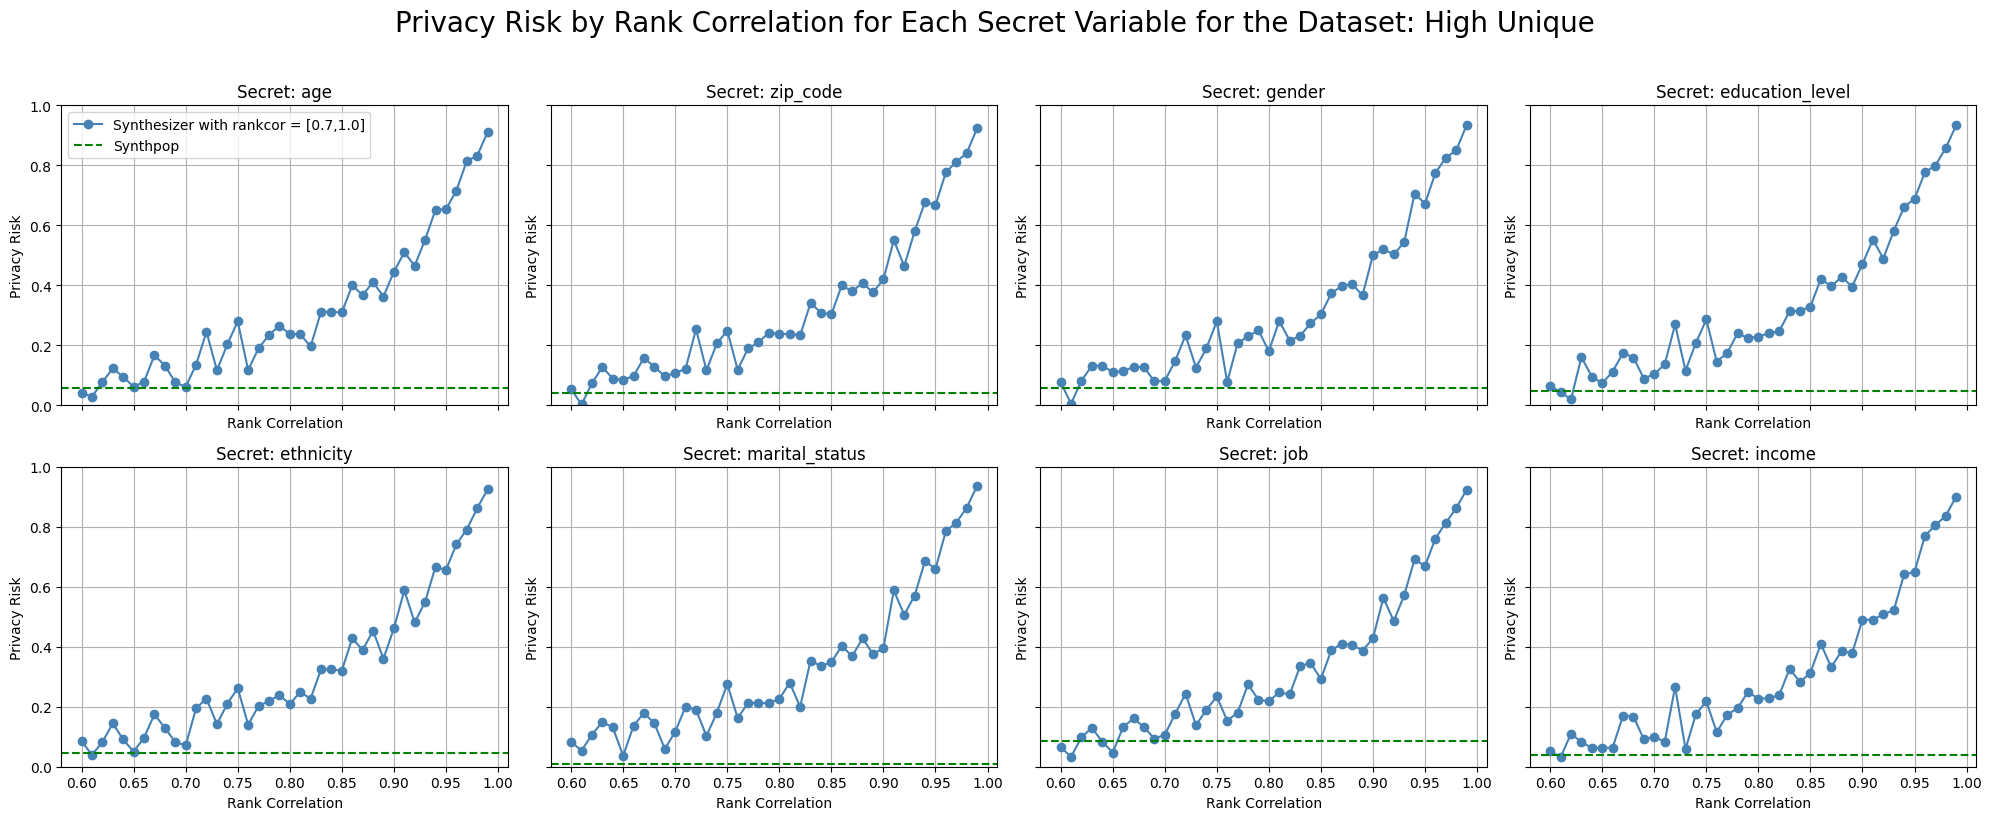

In [27]:
rankcors = [int(suffix) / 100 for suffix in suffixes]

risk1_dict = {secret: result.risk().value for secret, result in results3}

n = len(secret_columns)
cols = 4
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows), sharex=True, sharey=True)
axes = axes.flatten()

for idx, secret in enumerate(secret_columns):
    ax = axes[idx]
    
    ax.plot(rankcors, risk_by_secret[secret], marker='o', color='steelblue', label='Synthesizer with rankcor = [0.7,1.0]')

    if secret in risk1_dict:
        ax.axhline(y=risk1_dict[secret], color='green', linestyle='--', label='Synthpop')
    
    ax.set_title(f"Secret: {secret}")
    ax.set_ylim(0, 1)
    ax.set_xlabel("Rank Correlation")
    ax.set_ylabel("Privacy Risk")
    ax.grid(True)

    if idx == 0:
        ax.legend()

for j in range(idx + 1, len(axes)):
    axes[j].axis("off")

plt.suptitle("Privacy Risk by Rank Correlation for Each Secret Variable for the Dataset: High Unique", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

